# Tweet Sentiment Analysis

---

In [1]:
# General purpose packages
import numpy as np
import pandas as pd
import re
from bs4 import BeautifulSoup

# Data Visualization packages
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("fivethirtyeight")

# Natural Language ToolKit (For NLP)
# For downloading datasets run: nltk.download()
# nltk.download("movie_reviews")
# nltk.download("stopwords")
# nltk.download("omw-1.4")
import nltk
from nltk.corpus import movie_reviews
from nltk.stem import PorterStemmer,SnowballStemmer,LancasterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.stem import wordnet
from nltk.corpus import stopwords

In [2]:
# Stop words are words that have low importance in a sentence
stop_words = stopwords.words("english")
print(stop_words[0:10])
print(len(stop_words))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]
179


### Loading movie_review Dataset

In [3]:
words = movie_reviews.words()
print(words)
# Total number of words in the movie review
print(len(words))

['plot', ':', 'two', 'teen', 'couples', 'go', 'to', ...]
1583820


In [4]:
categories = movie_reviews.categories()
print(categories)

['neg', 'pos']


In [5]:
clean_words = [w for w in words if w not in stop_words and w.isalpha()]

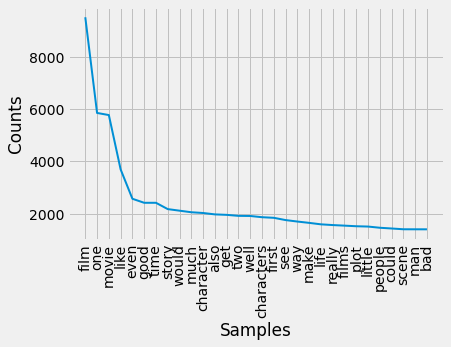

[('film', 9517), ('one', 5852), ('movie', 5771), ('like', 3690), ('even', 2565), ('good', 2411), ('time', 2411), ('story', 2169), ('would', 2109), ('much', 2049), ('character', 2020), ('also', 1967), ('get', 1949), ('two', 1911), ('well', 1906), ('characters', 1859), ('first', 1836), ('see', 1749), ('way', 1693), ('make', 1642), ('life', 1586), ('really', 1558), ('films', 1536), ('plot', 1513), ('little', 1501), ('people', 1455), ('could', 1427), ('scene', 1397), ('man', 1396), ('bad', 1395)]


In [6]:
freq_dist = nltk.probability.FreqDist(clean_words)
freq_dist.plot(30)
plt.show()
print(freq_dist.most_common(30))

In [7]:
nltk.FreqDist(clean_words).most_common(8)

[('film', 9517),
 ('one', 5852),
 ('movie', 5771),
 ('like', 3690),
 ('even', 2565),
 ('good', 2411),
 ('time', 2411),
 ('story', 2169)]

In [8]:
from wordcloud import WordCloud

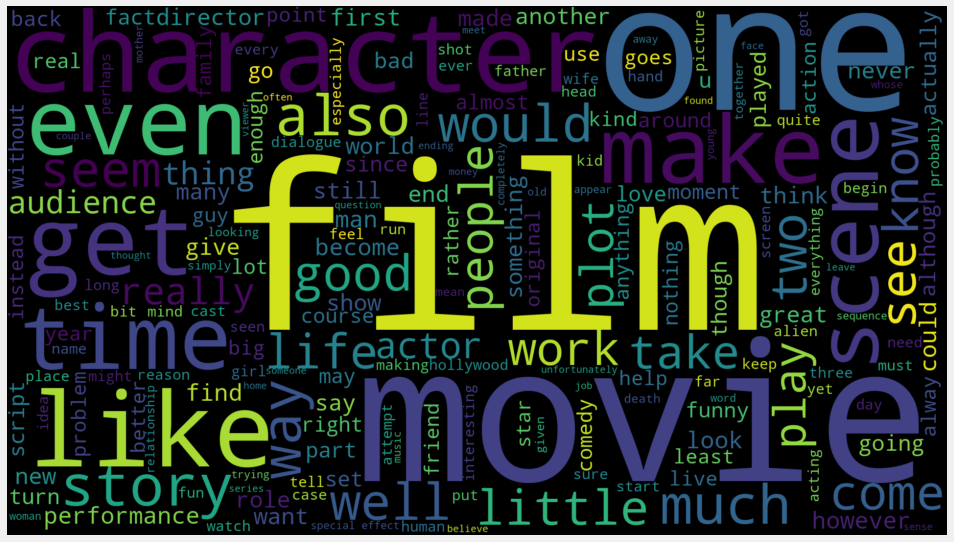

In [9]:
text = " ".join(clean_words)
wordcloud = WordCloud(stopwords=stop_words, background_color="black",
                     width=1920, height=1080).generate(text)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

---

### Loading IMDB Dataset

In [10]:
df = pd.read_csv("./Datasets/imdb.csv")

In [11]:
df.sample(5)

,review,sentiment
26534,***Spoilers ahead*** My late childhood had two...,positive
14689,The effect achieved in this story about a psyc...,negative
26174,"Remember the name Kevin Lime - and please, ple...",negative
48586,Skippy from Family Ties goes from clean-cut to...,positive
1201,This is an excellent movie and I wish that the...,positive


In [12]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


(50000, 2)

In [13]:
df.groupby("sentiment").count()

,review
sentiment,
negative,25000
positive,25000


In [14]:
# Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub("\[[^]]","", text)

# Removing the html strips
def strip_html(text):
    soup = BeautifulSoup(text,"html.parser")
    return soup.get_text()

# hold only numbers and alphabet
def remove_special_characters(text):
    return re.sub(r"[^a-zA-Z0-9\s]","",text)


# Removing the noisy text
def clean_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    text = remove_special_characters(text)
    return text.lower()

In [15]:
# Apply clean_text function to review column
df["clean_review"] = df["review"].apply(clean_text)

C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


In [16]:
df.head(5)

,review,sentiment,clean_review
0,One of the other reviewers has mentioned that ...,positive,one of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...,positive,a wonderful little production the filming tech...
2,I thought this was a wonderful way to spend ti...,positive,i thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...,negative,basically theres a family where a little boy j...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter matteis love in the time of money is a ...


---

### Text Stemming

Stemming is a natural language processing technique that lowers inflection in words to their root forms, hence aiding in the preprocessing of text, words, and documents for text normalization

In [17]:
def stem_text(text):
    ps = nltk.porter.PorterStemmer()
    text = " ".join([ps.stem(word) for word in text.split()])
    return text

In [18]:
df["stemmed_review"] = df["clean_review"].apply(stem_text)

In [19]:
df["stemmed_review"].head(4)

0    one of the other review ha mention that after ...
1    a wonder littl product the film techniqu is ve...
2    i thought thi wa a wonder way to spend time on...
3    basic there a famili where a littl boy jake th...
Name: stemmed_review, dtype: object

### Text Lemmatization

is a technique to break a word down to its root meaning to identify similarities

In [22]:
# lemm the text
def lemmatize_text(text):
    lm = WordNetLemmatizer()
    text = " ".join([lm.lemmatize(word) for word in text.split()])
    return text

In [23]:
# Apply lemmetize_text to stemmed_review
df["lemmatized_review"] = df["stemmed_review"].apply(lemmatize_text)

In [30]:
df.head(2)

,review,sentiment,clean_review,stemmed_review,lemmatized_review
0,One of the other reviewers has mentioned that ...,positive,one of the other reviewers has mentioned that ...,one of the other review ha mention that after ...,one of the other review ha mention that after ...
1,A wonderful little production. <br /><br />The...,positive,a wonderful little production the filming tech...,a wonder littl product the film techniqu is ve...,a wonder littl product the film techniqu is ve...


In [33]:
df["lemmatized_review"].head(3)

0    one of the other review ha mention that after ...
1    a wonder littl product the film techniqu is ve...
2    i thought thi wa a wonder way to spend time on...
Name: lemmatized_review, dtype: object

In [34]:
# Removing the stopwords
def remove_stopwords(text):
    return " ".join([w for w in text.split() if w not in stop_words])

In [35]:
df["review_without_stopwords"] = df["lemmatized_review"].apply(remove_stopwords)

In [37]:
text = " ".join([word for word in df["review_without_stopwords"]])

In [38]:
wordcloud1 = WordCloud(stopwords=stop_words, background_color="black",
                      width=1920, height= 1080).generate(text)

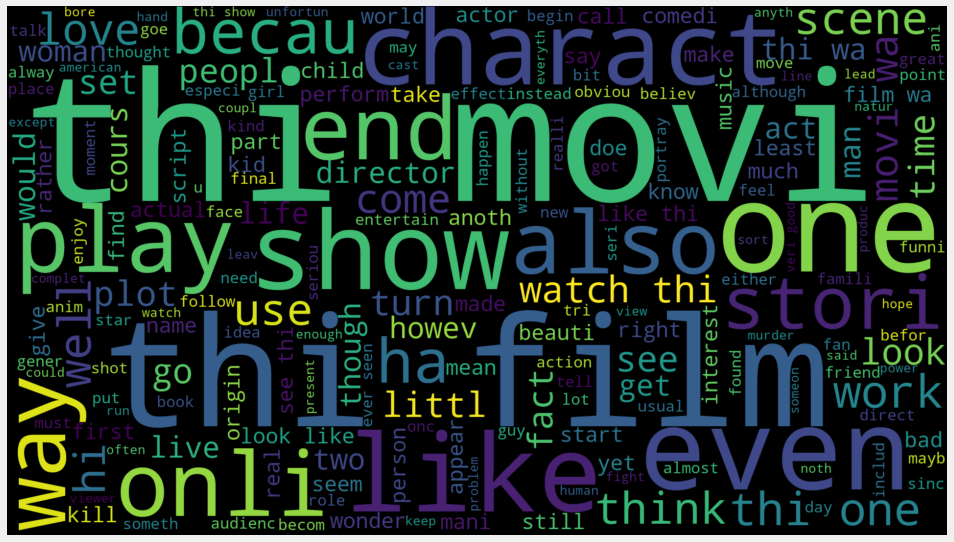

In [39]:
plt.figure(figsize=(15,10))
plt.imshow(wordcloud1, interpolation="bilinear")
plt.axis("off")
plt.show()

---

# Implementing Machine Learning Models

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [44]:
# Split the dataset
# Train dataset
X_train = df["review"][0:40_000]
y_train = df["sentiment"][0:40_000]

In [45]:
# Test dataset
X_test = df["review"][40_000:]
y_test = df["sentiment"][40_000:]

In [46]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(40000,) (40000,)
(10000,) (10000,)


In [47]:
#Bags of Words model
# It is used to convert text documents to numerical vectors of bag of words

In [48]:
# Count vectorizer for bag of words
cv = CountVectorizer(min_df=0, max_df=1, binary=False,
                 ngram_range=(1,3))
# transformed train reviews
cv_train_reviews = cv.fit_transform(X_train)
# transformed test reviews
cv_test_reviews = cv.transform(X_test)

print("BOW_cv_train:", cv_train_reviews.shape)
print("BOW_cv_test:", cv_test_reviews.shape)

BOW_cv_train: (40000, 6183315)
BOW_cv_test: (10000, 6183315)


In [49]:
# Term Frequency-Inverse Document Frequency model (TFIDF)
# It is used to convert text documents to matrix of tfidf features.

In [50]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import MultinomialNB

In [51]:
# Tfidf vectorizer
tv = TfidfVectorizer(min_df=0, max_df=1, use_idf=True, ngram_range=(1,3))
# transformed train reviews
tv_train_reviews = tv.fit_transform(X_train)
# transformed test reviews
tv_test_reviews = tv.transform(X_test)
print("Tfidf_train:", tv_train_reviews.shape)
print("Tfidf_test:", tv_test_reviews.shape)

Tfidf_train: (40000, 6183315)
Tfidf_test: (10000, 6183315)


In [52]:
type(tv_train_reviews)

scipy.sparse.csr.csr_matrix

In [53]:
tv_test_reviews[0:45]

<45x6183315 sparse matrix of type '<class 'numpy.float64'>'
	with 1731 stored elements in Compressed Sparse Row format>

In [54]:
# Train the Model
lr = LogisticRegression(penalty="l2",max_iter=500, C=1,
                       random_state=42)
# Fitting the model for Bag of Words
lr_bow = lr.fit(cv_train_reviews, y_train)
print(lr_bow)
# Fitting the model for tfidf features
lr_tfidf = lr.fit(tv_train_reviews, y_train)
print(lr_tfidf)

LogisticRegression(C=1, max_iter=500, random_state=42)
LogisticRegression(C=1, max_iter=500, random_state=42)


In [55]:
# Predicting the model for bag of words train dataset
lr_bow_predict_train = lr.predict(cv_train_reviews)
print(lr_bow_predict_train)

# Predicting the model for tfidf features
lr_tfidf_predict_train = lr.predict(tv_train_reviews)
print(lr_tfidf_predict_train)

['positive' 'positive' 'positive' ... 'positive' 'negative' 'negative']
['positive' 'positive' 'positive' ... 'positive' 'negative' 'negative']


In [56]:
from sklearn.metrics import accuracy_score

In [57]:
# Accuracy score for bag of words train dataset
lr_bow_score_train = accuracy_score(y_train, lr_bow_predict_train)
print("lr_bow_score_train: ", lr_bow_score_train)

# Accuracy score for tfidf features
lr_tfidf_score_train = accuracy_score(y_train, lr_tfidf_predict_train)
print("lr_tfidf_score_train: ", lr_tfidf_score_train)

lr_bow_score_train:  0.99625
lr_tfidf_score_train:  0.99625


In [58]:
# Predicting the model for bag of words test dataset
lr_bow_predict_test = lr.predict(cv_test_reviews)
print(lr_bow_predict_test)

# Predicting the model for tfidf features
lr_tfidf_predict_test = lr.predict(tv_test_reviews)
print(lr_tfidf_predict_test)

['negative' 'negative' 'negative' ... 'negative' 'negative' 'negative']
['negative' 'negative' 'negative' ... 'negative' 'negative' 'negative']


In [59]:
# Accuracy score for bag of words test dataset
lr_bow_score_test = accuracy_score(y_test, lr_bow_predict_test)
print("lr_bow_score_test: ", lr_bow_score_test)

# Accuracy score for tfidf features
lr_tfidf_score_test = accuracy_score(y_test, lr_tfidf_predict_test)
print("lr_tfidf_score_test: ", lr_tfidf_score_test)

lr_bow_score_test:  0.7676
lr_tfidf_score_test:  0.7659


---

# Classification report for bag of words

In [60]:
from sklearn.metrics import classification_report

In [61]:
lr_bow_report = classification_report(y_test, lr_bow_predict_test, target_names=["Positive","Negative"])
print(lr_bow_report)

              precision    recall  f1-score   support

    Positive       0.77      0.77      0.77      4993
    Negative       0.77      0.77      0.77      5007

    accuracy                           0.77     10000
   macro avg       0.77      0.77      0.77     10000
weighted avg       0.77      0.77      0.77     10000



# Classification report for tfidf features

In [62]:
lr_tfidf_report = classification_report(y_test, lr_tfidf_predict_test, target_names=["Positive","Negative"])
print(lr_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.76      0.78      0.77      4993
    Negative       0.78      0.75      0.76      5007

    accuracy                           0.77     10000
   macro avg       0.77      0.77      0.77     10000
weighted avg       0.77      0.77      0.77     10000



## Multinomial Naive Bayes for Bag of Words and TFIDF

In [66]:
# Train the model
mnb = MultinomialNB()
#fitting the svm for bag of words
mnb_bow = mnb.fit(cv_train_reviews, y_train)
print(mnb_bow)
#fitting the svm for tfidf features
mnb_tfidf = mnb.fit(tv_train_reviews, y_train)
print(mnb_tfidf)

MultinomialNB()
MultinomialNB()


In [67]:
# Predicting the model for bag of words
mnb_bow_predict_train = mnb.predict(cv_train_reviews)
print(mnb_bow_predict_train)
# Predicting the model for tfidf features
mnb_tfidf_predict_train = mnb.predict(tv_train_reviews)
print(mnb_tfidf_predict_train)

['positive' 'positive' 'positive' ... 'positive' 'negative' 'negative']
['positive' 'positive' 'positive' ... 'positive' 'negative' 'negative']


In [68]:
# Accuracy score for bag of words for training data
mnb_bow_score_train = accuracy_score(y_train, mnb_bow_predict_train)
print("mnb_bow_score_train: ", mnb_bow_score_train)
# Accuracy score for tfidf features
mnb_tfidf_score_train = accuracy_score(y_train, mnb_tfidf_predict_train)
print("mnb_tfidf_score_train: ", mnb_tfidf_score_train)

mnb_bow_score_train:  0.99625
mnb_tfidf_score_train:  0.99625


In [69]:
#Predicting the model for bag of words test dataset
mnb_bow_predict_test=mnb.predict(cv_test_reviews)
print(mnb_bow_predict_test)
#Predicting the model for tfidf features
mnb_tfidf_predict_test=mnb.predict(tv_test_reviews)
print(mnb_tfidf_predict_test)

['negative' 'negative' 'negative' ... 'negative' 'negative' 'negative']
['negative' 'negative' 'negative' ... 'negative' 'negative' 'negative']


In [70]:
#Accuracy score for bag of words test data
mnb_bow_score_test = accuracy_score(y_test,mnb_bow_predict_test)
print("mnb_bow_score_test :",mnb_bow_score_test)
#Accuracy score for tfidf features
mnb_tfidf_score_test =accuracy_score(y_test,mnb_tfidf_predict_test)
print("mnb_tfidf_score_test :",mnb_tfidf_score_test)

mnb_bow_score_test : 0.7682
mnb_tfidf_score_test : 0.7677


In [72]:
#Classification report for bag of words 
mnb_bow_report=classification_report(y_test,mnb_bow_predict_test,target_names=['Positive','Negative'])
print(mnb_bow_report)
#Classification report for tfidf features
mnb_tfidf_report=classification_report(y_test,mnb_tfidf_predict_test,target_names=['Positive','Negative'])
print(mnb_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.76      0.78      0.77      4993
    Negative       0.77      0.76      0.77      5007

    accuracy                           0.77     10000
   macro avg       0.77      0.77      0.77     10000
weighted avg       0.77      0.77      0.77     10000

              precision    recall  f1-score   support

    Positive       0.76      0.78      0.77      4993
    Negative       0.77      0.76      0.77      5007

    accuracy                           0.77     10000
   macro avg       0.77      0.77      0.77     10000
weighted avg       0.77      0.77      0.77     10000



# Well Done!